# <center>Data Visualization with Python</center>

## I. Python Scientific Computing & Basic Plotting (Numpy & Matplotlib) 

In this project, we will study a new library in python that offers fast, memory efficient manipulation of vectors, matrices and tensors: **numpy**. We will also study basic plotting of data using the most popular data visualization libraries in the python ecosystem: **matplotlib**. 


In [3]:
# Some IPython magic
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### Python scientific computing ecosystem
For scientific computing we need an environment that is easy to use, and provides a couple of tools like manipulating data and visualizing results.
Python is very easy to use, but the downside is that it's not fast at numerical computing. Luckily, we have very eficient libraries for all our use-cases.

### Libraries

#### Core computing libraries

- `numpy` and `scipy`: scientific computing
- `matplotlib`: plotting library

#### Machine Learning
- `sklearn`: machine learning toolkit
- `tensorflow`: deep learning framework developed by google
- `keras`: deep learning framework on top of `tensorflow` for easier implementation
- `pytorch`: deep learning framework developed by facebook


#### Statistics and data analysis
- `pandas`: very popular data analysis library
- `statsmodels`: statistics

We also have advanced interactive environments:
- Ipython: advanced python console
- Jupyter: notebooks in the browser

There are many more scientific libraries available.

Check out these cheetsheets for fast reference to the common libraries:

**Cheat sheets:**
- [python](https://perso.limsi.fr/pointal/_media/python:cours:mementopython3-english.pdf)
- [numpy](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [sklearn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [pandas](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

**Other:**
- [Probabilities & Stats Refresher](https://stanford.edu/~shervine/teaching/cs-229/refresher-probabilities-statistics)
- [Algebra](https://stanford.edu/~shervine/teaching/cs-229/refresher-algebra-calculus)

### numpy
`numpy` works with tensors of data, the main data structure is `numpy.array` or `numpy.ndarray`.


**Why it is useful:** Memory-efficient container that provides fast numerical operations.

#### Speed test

In [2]:
%timeit [x**2 for x in range(1000)]

380 µs ± 20.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [3]:
%timeit np.arange(1000)**2

3.88 µs ± 292 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


It is clear that math operations using numpy arrays are far more efficient computation-wise than using plain python lists. More than that, numpy arrays offer a rich API for ***tensor*** manipulation.

![](https://miro.medium.com/max/1000/0*jGB1CGQ9HdeUwlgB)

#### Working with numpy arrays

a few important attributes of the `array` structure: 
- `ndarray.ndim` - number of axes (tensor rank)
- `ndarray.shape` - tuple, gives dimensions of each axes.
- `ndarray.size` - size of the array (product of elements of `ndarray.shape`)
- `ndarray.dtype` - data type

In [4]:
a = np.array([[2,7,5],[0,-1,2]])
print(a)
print("Dim:  ",a.ndim)
print("Shape:",a.shape)
print("Size: ",a.size)
print("Type: ",a.dtype)

[[ 2  7  5]
 [ 0 -1  2]]
Dim:   2
Shape: (2, 3)
Size:  6
Type:  int64


#### Shape Manipulation

![](https://fgnt.github.io/python_crashkurs_doc/_images/numpy_array_t.png)

In [5]:
x = np.array([1,1,2])
x.shape

(3,)

In [6]:
x.reshape(1,3)

array([[1, 1, 2]])

In [7]:
x.reshape(1,4) # this will fail because dimensions don't match

ValueError: cannot reshape array of size 3 into shape (1,4)

In [8]:
x.reshape(1,-1)

array([[1, 1, 2]])

In [9]:
a = np.floor(10*np.random.random((3,4))) # some random matrix
a

array([[2., 3., 3., 8.],
       [0., 9., 2., 1.],
       [2., 9., 4., 5.]])

In [10]:
a.shape # a tuple that describes the shape of the object

(3, 4)

In [11]:
a.ravel() # flattened list

array([2., 3., 3., 8., 0., 9., 2., 1., 2., 9., 4., 5.])

In [12]:
a.T # transpose

array([[2., 0., 2.],
       [3., 9., 9.],
       [3., 2., 4.],
       [8., 1., 5.]])

In [13]:
a.reshape(2,1,-1) # -1 means "as much as you need", such that the dimensions maches the size

array([[[2., 3., 3., 8., 0., 9.]],

       [[2., 1., 2., 9., 4., 5.]]])

![](https://i.pinimg.com/originals/79/08/bd/7908bd4f6d0040cb0df7a20de6d814fc.png)

#### Initializing
- `np.zeros(shape)`
- `np.ones(shape)`
- `np.empty(shape)`
- `np.eye(rows, cols)`

Those functions take as input the shape of an array. 


#### Sequences
- `np.arange` - like Python's `range()`, but returns a `np.array`
- `np.linspace` - n equidistant points in interval [a,b]


In [14]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [15]:
np.linspace(1, 2, 5)

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

#### Math operators
Math operators are applied elementwise. ( `*` is never the dot product for numpy arrays!)

In [16]:
a = np.ones((2,3), dtype=int)
a *= 3
a

array([[3, 3, 3],
       [3, 3, 3]])

In [17]:
a = a - 1
a

array([[2, 2, 2],
       [2, 2, 2]])

In [18]:
a = a + np.ones_like(a) / 5
a

array([[2.2, 2.2, 2.2],
       [2.2, 2.2, 2.2]])

In [19]:
print("Pointwise multiplication:\n", a * np.ones_like(a) * 2 )
print("Dot Product (matrix multiplication)\n", np.dot(a.T, np.ones_like(a) * 2))

Pointwise multiplication:
 [[4.4 4.4 4.4]
 [4.4 4.4 4.4]]
Dot Product (matrix multiplication)
 [[8.8 8.8 8.8]
 [8.8 8.8 8.8]
 [8.8 8.8 8.8]]


#### Linear Algebra
numpy has implementations of some of the most common algebraic operations.
The most common one, the dot product is implemented both as a method of the array object and as a numpy function.

Matrix multiplication can be performed either using the dot product or `np.matmul`. Using functions from numpy you can 
- find eigenvalues and eigenvectors, 
- compute some decompositions (QR, SVD), 
- compute determinant of a matrix, 
- norm of a vector,
- solve a linear system
- invert a matrix

See [the documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html)

### Matplotlib

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Almost all python plotting frameworks make use of matplotlib behind the scenes. 

Plotting data is an effective way to convey the message hidden in the data. A good plot is worth a thousand words, and it can be difficult to unambiguously transmit your intended message. Different types of plots that represent the same data (i.e. scatter plots, linear plots, bar plots, pie charts etc.) can be perceived differently depending on who's looking.

Check out this article for some tips on better plotting:

[Ten Simple Rules for Better Figures](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)

**NB:** Do note that, regardless of the type of plot and data, ***all*** plots must have properly annotated axis ticks, axis labels, a title and a caption.


For a more comprehensive tutorial on matplotlib, check out this resource:

[Matplotlib Tutorial – A Complete Guide to Python Plot w/ Examples](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### The elements of a plot

#### The figure and the axes
The figure is the entire image, the individual plots are called "axes". Here's a description from matplotlib's documentation.

![](https://matplotlib.org/_images/anatomy1.png)

#### Scatter & Line Plots

Scatter plots are used to plot data points on horizontal and vertical axis in the attempt to show how much one variable is affected by another. Each row in the data table is represented by a marker the position depends on its values in the columns set on the X and Y axes. A third variable can be set to correspond to the color or size of the markers, thus adding yet another dimension to the plot.


We will plot a simple regression line with generated data.

In [21]:
M = 10
N = 5

X = np.random.random(size = 100)
y_true = M * X + N

y_noise = y_true + np.random.normal(size = 100)

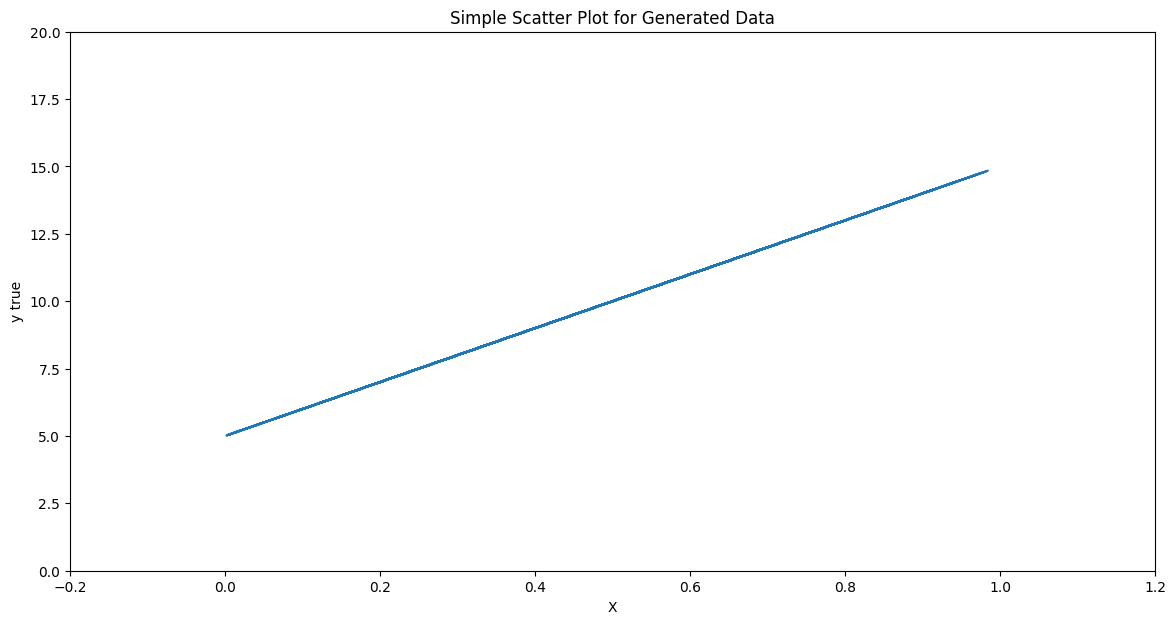

In [22]:
plt.plot(X, y_true)
plt.xlim(-0.2, 1.2)
plt.ylim(0, 20)

plt.xlabel("X")
plt.ylabel("y true")

plt.title("Simple Scatter Plot for Generated Data")
plt.gcf().set_size_inches(14, 7)


Text(0.5, 1.0, 'Simple Scatter Plot for Generated Data')

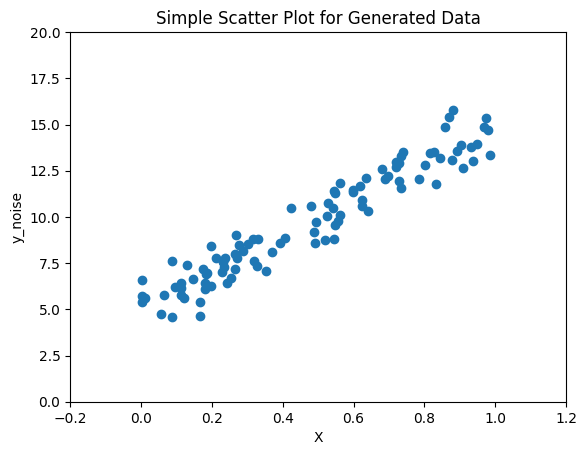

In [23]:
plt.scatter(X, y_noise)
plt.xlim(-0.2, 1.2)
plt.ylim(0, 20)

plt.xlabel("X")
plt.ylabel("y_noise")

plt.title("Simple Scatter Plot for Generated Data")

We can plot the two variables one on top of the other, for a better visualization. Make sure to add a legend, and different coloring, such that it is clear which part of the plot belongs to which set of variables.

Matplotlib also offers a wide range of **markers** to better differentiate between multiple data categories. Check https://matplotlib.org/api/markers_api.html for a full list.

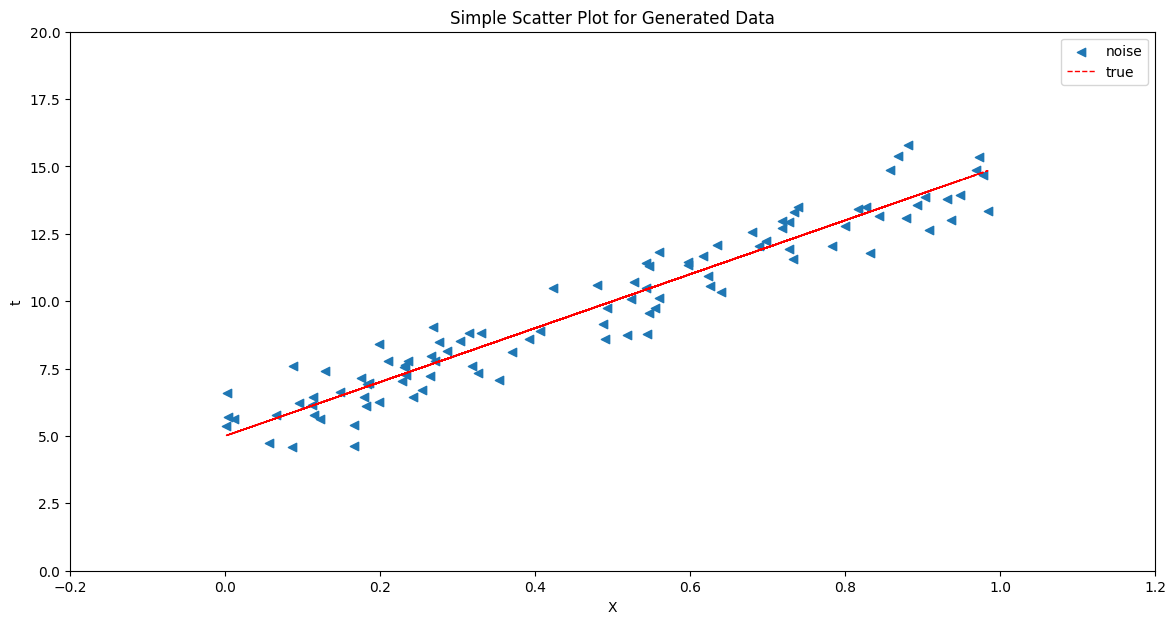

In [24]:
plt.scatter(X, y_noise, label = 'noise', marker = '<')
plt.plot(X, y_true, color = 'r', label = 'true', linestyle = 'dashed', linewidth = 1)

plt.xlim(-0.2, 1.2)
plt.ylim(0, 20)

plt.xlabel("X")
plt.ylabel("t")

plt.title("Simple Scatter Plot for Generated Data")
plt.legend()
plt.gcf().set_size_inches(14, 7)

#### Bar Plots

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

A bar graph shows comparisons among discrete categories. One axis of the chart shows the specific categories being compared, and the other axis represents a measured value.

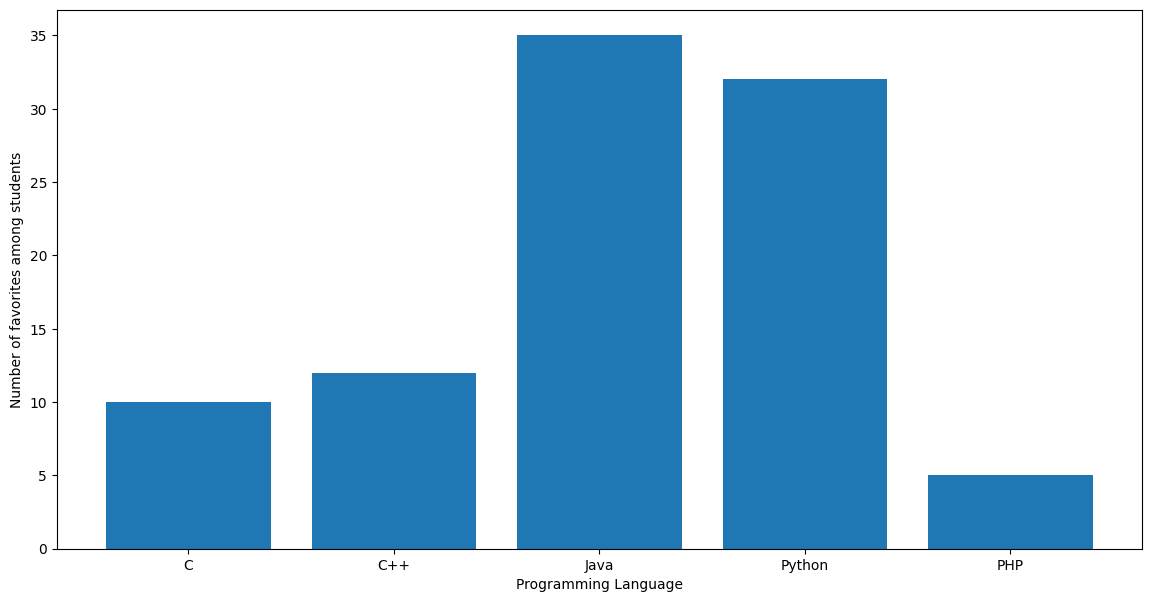

In [25]:
languages = ['C', 'C++', 'Java', 'Python', 'PHP']
students = [10, 12, 35, 32, 5]

ax = plt.subplot()
ax.bar(languages, students)

plt.xlabel('Programming Language')
plt.ylabel("Number of favorites among students")
plt.gcf().set_size_inches(14, 7)

We can make multiple bars for each category. It makes it easier for comparing different quantities with a common category.

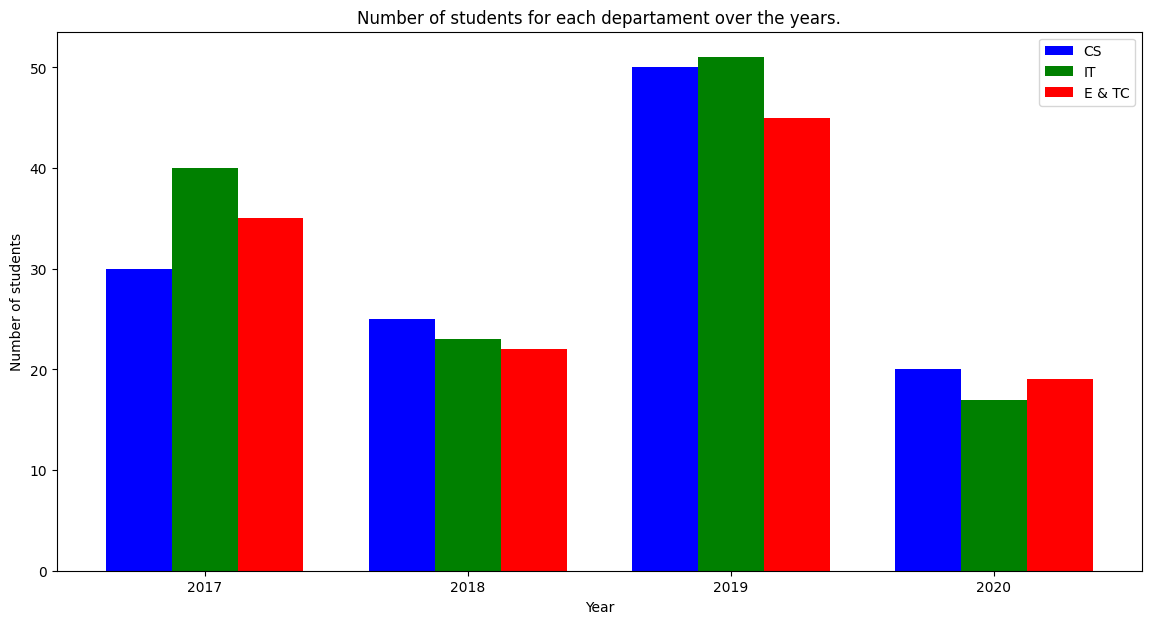

In [26]:
data = [
  [30, 25, 50, 20],
  [40, 23, 51, 17],
  [35, 22, 45, 19]
]

X = np.arange(4)
ax = plt.subplot()

ax.bar(X + 0.00, data[0], color = 'b', width = 0.25, label = 'CS')
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25, label = 'IT')
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25, label = 'E & TC')

ax.set_xticks(X + 0.25)
ax.set_xticklabels(X + 2017)

plt.xlabel("Year")
plt.ylabel("Number of students")
plt.title("Number of students for each departament over the years.")
ax.legend()
plt.gcf().set_size_inches(14, 7)

#### Box Plots

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.


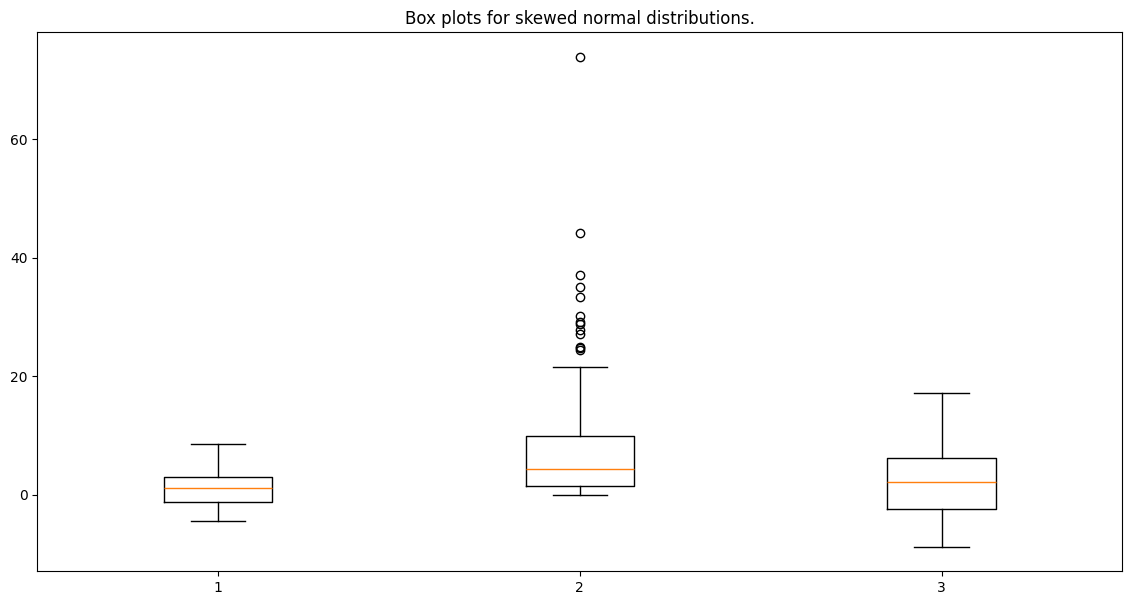

In [27]:
data = np.random.normal(size = 100, scale = 3.0, loc = 1.0)

ax = plt.subplot()
ax.boxplot([data, data ** 2, data * 2])

plt.title("Box plots for skewed normal distributions.")
plt.gcf().set_size_inches(14, 7)

#### Plotting a dataset

Plot different aspects of the Wine Dataset from sklearn. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

**6.1** Create a plot for visualizing the distribution of one features (e.g. alchohol level / malic acid / ash etc.) for each class of wine.

**6.2** Create 3 subplots highlighting different aspects of the dataset. Choose the appropriate plot types (scatter plot, line plot, bar plot, box plot etc.). You can choose various combinations of columns to gain a better understanding of this dataset.

Be creative! You can color your points using the `target` array. Remember to always have labels on your axes, appropriate ticks, a legend where necessary, and a plot title.

<Figure size 1000x600 with 0 Axes>

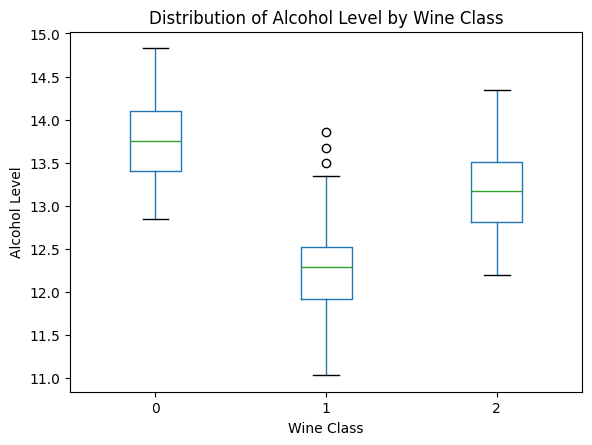

In [5]:
from sklearn.datasets import load_wine
import pandas as pd

wine_dataset = load_wine()

data = wine_dataset['data']
target = wine_dataset['target']

column_names = wine_dataset['feature_names']

# TODO your code here

df = pd.DataFrame(wine_dataset['data'], columns=wine_dataset['feature_names'])
df['target'] = wine_dataset['target']

# Create a box plot for the alcohol level
plt.figure(figsize=(10, 6))
df.boxplot(column='alcohol', by='target', grid=False)
plt.title('Distribution of Alcohol Level by Wine Class')
plt.suptitle('')  # Remove the default subtitle
plt.xlabel('Wine Class')
plt.ylabel('Alcohol Level')
plt.show()


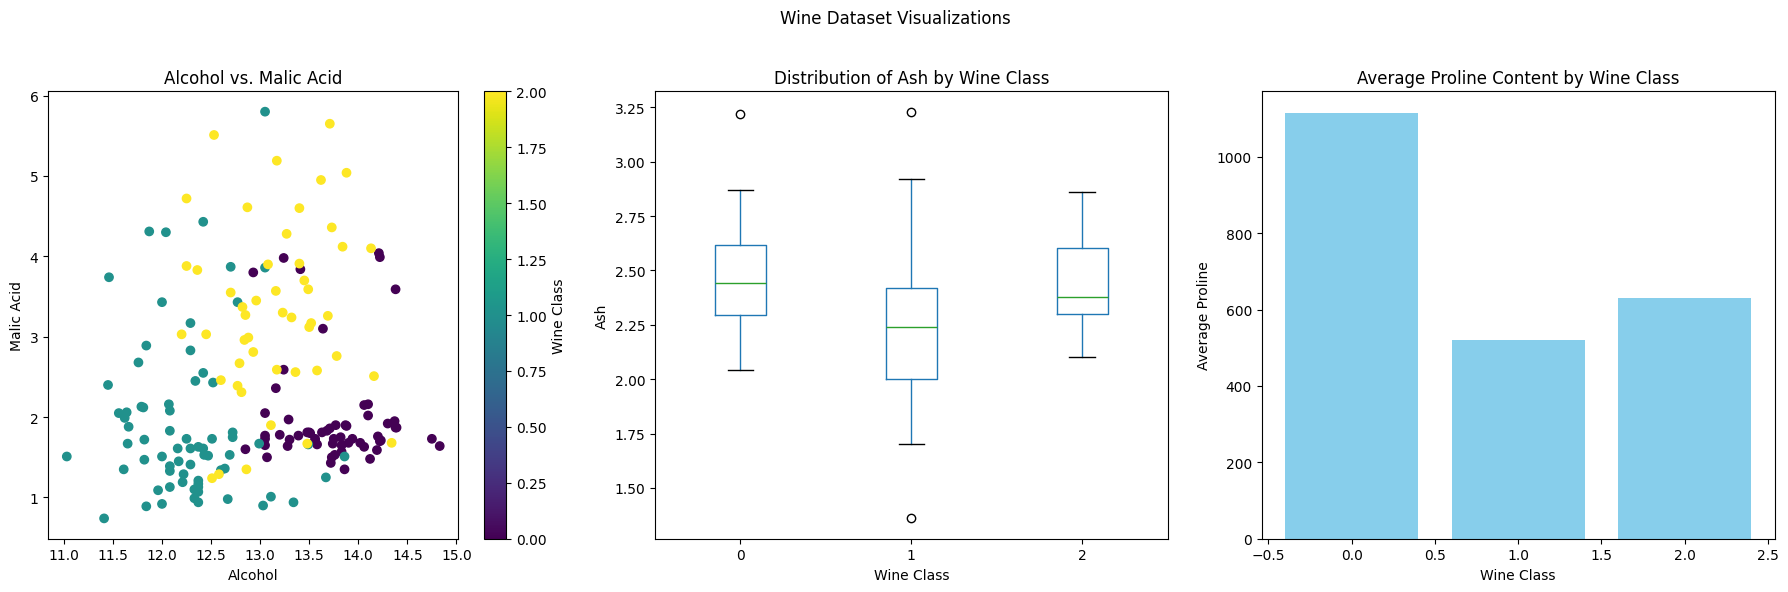

In [7]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter Plot: Alcohol vs. Malic Acid
scatter = axes[0].scatter(df['alcohol'], df['malic_acid'], c=df['target'], cmap='viridis')
axes[0].set_title('Alcohol vs. Malic Acid')
axes[0].set_xlabel('Alcohol')
axes[0].set_ylabel('Malic Acid')

# Box Plot: Distribution of Ash by Wine Class
df.boxplot(column='ash', by='target', ax=axes[1], grid=False)
axes[1].set_title('Distribution of Ash by Wine Class')
axes[1].set_xlabel('Wine Class')
axes[1].set_ylabel('Ash')

# Bar Plot: Average Proline Content by Wine Class
avg_proline = df.groupby('target')['proline'].mean()
axes[2].bar(avg_proline.index, avg_proline.values, color='skyblue')
axes[2].set_title('Average Proline Content by Wine Class')
axes[2].set_xlabel('Wine Class')
axes[2].set_ylabel('Average Proline')

# Add a color bar for the scatter plot
fig.colorbar(scatter, ax=axes[0], label='Wine Class')

# Adjust layout and add a main title
plt.suptitle('Wine Dataset Visualizations')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## II - Data Manipulation & Advanced Plotting (pandas, seaborn & 3D Plotting)

In this lab, we will study data manipulation and visualization using **pandas**, and explore the high level API of **seaborn** for generating visually appealing plots. We will also take a look at 3D plotting using **mplot3d**. 

Check out these cheetsheets for fast reference to the common libraries:

**Cheat sheets:**
- [python](https://perso.limsi.fr/pointal/_media/python:cours:mementopython3-english.pdf)
- [numpy](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [matplotlib](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)
- [sklearn](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)
- [pandas](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)

**Other:**
- [Probabilities & Stats Refresher](https://stanford.edu/~shervine/teaching/cs-229/refresher-probabilities-statistics)
- [Algebra](https://stanford.edu/~shervine/teaching/cs-229/refresher-algebra-calculus)

### Pandas Crash Course

Pandas is a high-level data manipulation tool. It is built on the Numpy package and its key data structure is called the DataFrame. DataFrames allow you to store and manipulate tabular data in rows of observations and columns of variables.

Check this official guide for a started in pandas:

[10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

In [10]:

import pandas as pd

Pandas DataFrame is two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns. Pandas DataFrame consists of three principal components, the data, rows, and columns.

![](https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png)



Let's load a publicly available *.csv* dataset into a pandas ***DataFrame***. We will use the popular *iris* dataset.


In [11]:
file_name = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

df = pd.read_csv(file_name)
df.head(n = 10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


A dataframe's **.describe()** method offers descriptive statistics which include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's see some ways in which we can access the DataFrames' data. Each column of a pandas `DataFrame` is a pandas `Series`.

In [13]:
df['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

We can do any vectorized operation on a `Series`. Moreover, a pandas `Series` allows us to do conditional selection of rows in a `DataFrame`.

In [14]:
setosas = df[df['species'] == 'setosa']

setosas.head() # only setosa species selected

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We can add a new column to a pandas `DataFrame`, simply by specifying its name and its contents.

**NB**: the data added to the new column must be the same length as the rest of the `DataFrame`.

In [15]:
df['sepal_area'] = df['sepal_length'] * df['sepal_width'] # adding new columns
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,1.4,0.2,setosa,17.85
1,4.9,3.0,1.4,0.2,setosa,14.70
2,4.7,3.2,1.3,0.2,setosa,15.04
3,4.6,3.1,1.5,0.2,setosa,14.26
4,5.0,3.6,1.4,0.2,setosa,18.00


We can work with `Series` as we work with numpy arrays. We perform Min-Max normalization on the `petal_length` column.

In [16]:
# Min-Max Normalization
df['petal_length'] = (df['petal_length'] - df['petal_length'].min()) / (df['petal_length'].max() - df['petal_length'].min())
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,0.067797,0.2,setosa,17.85
1,4.9,3.0,0.067797,0.2,setosa,14.70
2,4.7,3.2,0.050847,0.2,setosa,15.04
3,4.6,3.1,0.084746,0.2,setosa,14.26
4,5.0,3.6,0.067797,0.2,setosa,18.00


We can also use the `.apply()` method on either a `Series` or a `DataFrame` to modify its contents, or create a new column.

In [17]:
def capitalize(col):
  return col.capitalize()

df['species'] = df['species'].apply(capitalize)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area
0,5.1,3.5,0.067797,0.2,Setosa,17.85
1,4.9,3.0,0.067797,0.2,Setosa,14.70
2,4.7,3.2,0.050847,0.2,Setosa,15.04
3,4.6,3.1,0.084746,0.2,Setosa,14.26
4,5.0,3.6,0.067797,0.2,Setosa,18.00


A `DataFrame` also has a `groupby` method, that allows us to work on groupings of rows.

In [18]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,sepal_area
species,,,,,
Setosa,5.006,3.418,0.078644,0.244,17.2088
Versicolor,5.936,2.770,0.552542,1.326,16.5262
Virginica,6.588,2.974,0.771525,2.026,19.6846


We can also iterate through each group. A group is another `DataFrame`.

In [19]:
for name, group in df.groupby('species'):
  print("Group:", name)
  print(group.head())
  print("-----")

Group: Setosa
   sepal_length  sepal_width  petal_length  petal_width species  sepal_area
0           5.1          3.5      0.067797          0.2  Setosa       17.85
1           4.9          3.0      0.067797          0.2  Setosa       14.70
2           4.7          3.2      0.050847          0.2  Setosa       15.04
3           4.6          3.1      0.084746          0.2  Setosa       14.26
4           5.0          3.6      0.067797          0.2  Setosa       18.00
-----
Group: Versicolor
    sepal_length  sepal_width  petal_length  petal_width     species  \
50           7.0          3.2      0.627119          1.4  Versicolor   
51           6.4          3.2      0.593220          1.5  Versicolor   
52           6.9          3.1      0.661017          1.5  Versicolor   
53           5.5          2.3      0.508475          1.3  Versicolor   
54           6.5          2.8      0.610169          1.5  Versicolor   

    sepal_area  
50       22.40  
51       20.48  
52       21.39  
53   

#### Joins

Pandas allows for joining two or more `DataFrames` together using a common key. We can also do vertical or horizontal concatenation .

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1524477162/data-frames-in-python-banner_cgzjxy.png)

In [20]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3'],
                     'C': ['C0', 'C1', 'C2', 'C3'],
                     'D': ['D0', 'D1', 'D2', 'D3']})
df2 = pd.DataFrame({'A': ['A0', 'A1', 'A4', 'A5'],
                     'B': ['B4', 'B5', 'B6', 'B7'],
                     'C': ['C4', 'C5', 'C6', 'C7'],
                     'D': ['D4', 'D5', 'D6', 'D7']})
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                     'B': ['B8', 'B9', 'B10', 'B11'],
                     'C': ['C8', 'C9', 'C10', 'C11'],
                     'D': ['D8', 'D9', 'D10', 'D11']})

pd.concat([df1, df2, df3]).reset_index(drop = True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A0,B4,C4,D4
5,A1,B5,C5,D5
6,A4,B6,C6,D6
7,A5,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [21]:
pd.merge(df1, df2, on = 'A', how = 'left')

,A,B_x,C_x,D_x,B_y,C_y,D_y
0,A0,B0,C0,D0,B4,C4,D4
1,A1,B1,C1,D1,B5,C5,D5
2,A2,B2,C2,D2,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN


#### Saving `DataFrames`

Pandas offers a multitude of methods for saving `DataFrames`.

In [22]:
df.to_csv('out.csv', index = False) # saves it locally, check out the files in the right tab of colab

In [23]:
df.to_json()

'{"sepal_length":{"0":5.1,"1":4.9,"2":4.7,"3":4.6,"4":5.0,"5":5.4,"6":4.6,"7":5.0,"8":4.4,"9":4.9,"10":5.4,"11":4.8,"12":4.8,"13":4.3,"14":5.8,"15":5.7,"16":5.4,"17":5.1,"18":5.7,"19":5.1,"20":5.4,"21":5.1,"22":4.6,"23":5.1,"24":4.8,"25":5.0,"26":5.0,"27":5.2,"28":5.2,"29":4.7,"30":4.8,"31":5.4,"32":5.2,"33":5.5,"34":4.9,"35":5.0,"36":5.5,"37":4.9,"38":4.4,"39":5.1,"40":5.0,"41":4.5,"42":4.4,"43":5.0,"44":5.1,"45":4.8,"46":5.1,"47":4.6,"48":5.3,"49":5.0,"50":7.0,"51":6.4,"52":6.9,"53":5.5,"54":6.5,"55":5.7,"56":6.3,"57":4.9,"58":6.6,"59":5.2,"60":5.0,"61":5.9,"62":6.0,"63":6.1,"64":5.6,"65":6.7,"66":5.6,"67":5.8,"68":6.2,"69":5.6,"70":5.9,"71":6.1,"72":6.3,"73":6.1,"74":6.4,"75":6.6,"76":6.8,"77":6.7,"78":6.0,"79":5.7,"80":5.5,"81":5.5,"82":5.8,"83":6.0,"84":5.4,"85":6.0,"86":6.7,"87":6.3,"88":5.6,"89":5.5,"90":5.5,"91":6.1,"92":5.8,"93":5.0,"94":5.6,"95":5.7,"96":5.7,"97":6.2,"98":5.1,"99":5.7,"100":6.3,"101":5.8,"102":7.1,"103":6.3,"104":6.5,"105":7.6,"106":4.9,"107":7.3,"108":6.7,"1

In [25]:
print(df.head().to_markdown())

|    |   sepal_length |   sepal_width |   petal_length |   petal_width | species   |   sepal_area |
|---:|---------------:|--------------:|---------------:|--------------:|:----------|-------------:|
|  0 |            5.1 |           3.5 |      0.0677966 |           0.2 | Setosa    |        17.85 |
|  1 |            4.9 |           3   |      0.0677966 |           0.2 | Setosa    |        14.7  |
|  2 |            4.7 |           3.2 |      0.0508475 |           0.2 | Setosa    |        15.04 |
|  3 |            4.6 |           3.1 |      0.0847458 |           0.2 | Setosa    |        14.26 |
|  4 |            5   |           3.6 |      0.0677966 |           0.2 | Setosa    |        18    |


In [26]:
print(df.head().to_latex())

\begin{tabular}{lrrrrlr}
\toprule
 & sepal_length & sepal_width & petal_length & petal_width & species & sepal_area \\
\midrule
0 & 5.100000 & 3.500000 & 0.067797 & 0.200000 & Setosa & 17.850000 \\
1 & 4.900000 & 3.000000 & 0.067797 & 0.200000 & Setosa & 14.700000 \\
2 & 4.700000 & 3.200000 & 0.050847 & 0.200000 & Setosa & 15.040000 \\
3 & 4.600000 & 3.100000 & 0.084746 & 0.200000 & Setosa & 14.260000 \\
4 & 5.000000 & 3.600000 & 0.067797 & 0.200000 & Setosa & 18.000000 \\
\bottomrule
\end{tabular}



In [27]:
print(df.head(n = 3).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sepal_length</th>
      <th>sepal_width</th>
      <th>petal_length</th>
      <th>petal_width</th>
      <th>species</th>
      <th>sepal_area</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>5.1</td>
      <td>3.5</td>
      <td>0.067797</td>
      <td>0.2</td>
      <td>Setosa</td>
      <td>17.85</td>
    </tr>
    <tr>
      <th>1</th>
      <td>4.9</td>
      <td>3.0</td>
      <td>0.067797</td>
      <td>0.2</td>
      <td>Setosa</td>
      <td>14.70</td>
    </tr>
    <tr>
      <th>2</th>
      <td>4.7</td>
      <td>3.2</td>
      <td>0.050847</td>
      <td>0.2</td>
      <td>Setosa</td>
      <td>15.04</td>
    </tr>
  </tbody>
</table>


In [ ]:
df.to_sql(name = '<table_name>', con = '<connection>') # insert into a sql database, works with a valid connection 
# check out https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html

#### Pandas Plotting

Pandas offers a convenient API for plotting data directly from a DataFrame. Of course, the plotting API is build upon `matplotlib` as a low level backend. We can use that to manipulate plots as in the previous lab.
Check out the official documentation for visualization:

[Pandas Plotting Docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization)


For a quick reference, check the official cookbook.

[Pandas Plotting Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook-plotting)

We will use the high level plotting API to visualize the Iris Dataset.

<Axes: >

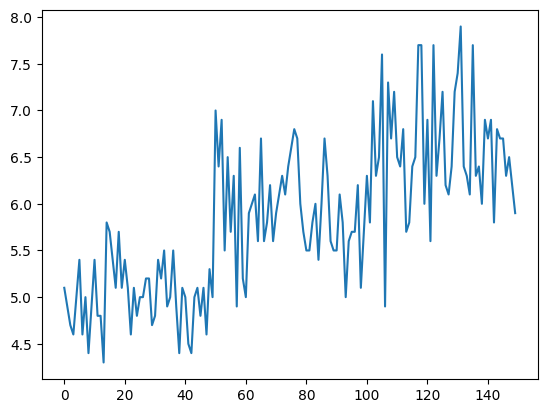

In [28]:
df['sepal_length'].plot()

<Axes: >

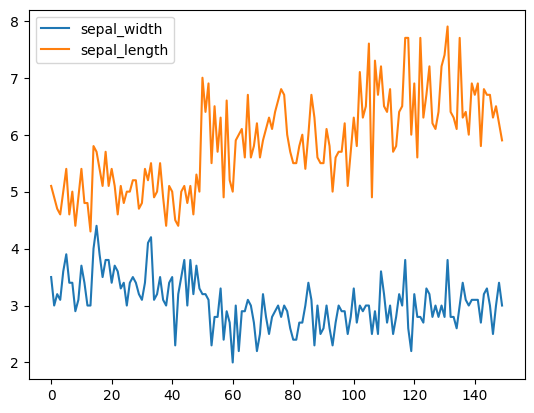

In [29]:
df[['sepal_width', 'sepal_length']].plot()

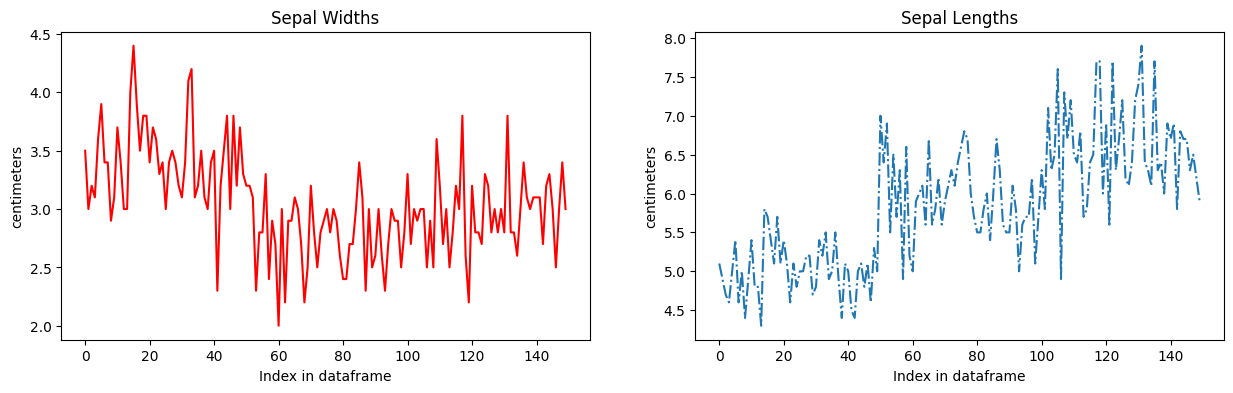

In [30]:
fig, ax = plt.subplots(1, 2)

df['sepal_width'].plot(ax = ax[0], color = 'r')
df['sepal_length'].plot(ax = ax[1], linestyle = '-.')

ax[0].set_title('Sepal Widths')
ax[1].set_title('Sepal Lengths')

ax[0].set_xlabel('Index in dataframe')
ax[1].set_xlabel('Index in dataframe')

ax[0].set_ylabel('centimeters')
ax[1].set_ylabel('centimeters')


fig.set_size_inches(15, 4)

<Axes: ylabel='Frequency'>

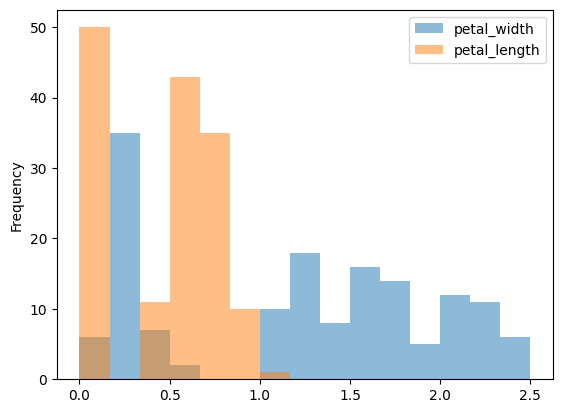

In [31]:
df[['petal_width', 'petal_length']].plot.hist(alpha = 0.5, bins = 15)

<Axes: ylabel='Density'>

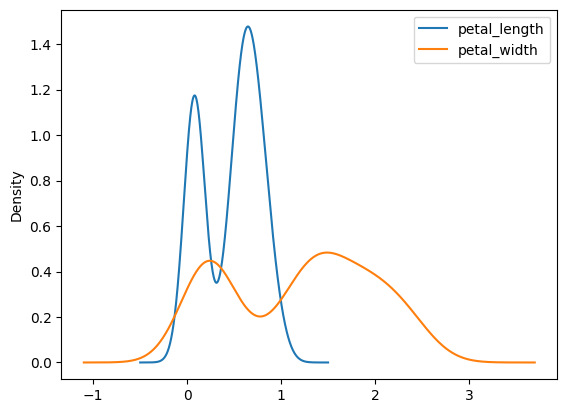

In [32]:
df[['petal_length', 'petal_width']].plot.kde()

#### Cool Plots using Seaborn & Pandas


Check out [seaborn](https://seaborn.pydata.org/examples/index.html) for more awesome plots.

In [33]:
import seaborn as sns

sns.set_theme()

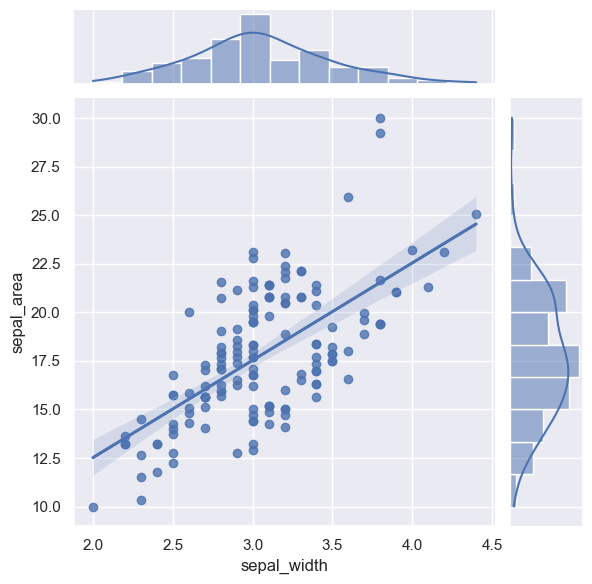

In [34]:
sns.jointplot(x = 'sepal_width', y = 'sepal_area', data = df, kind = 'reg')

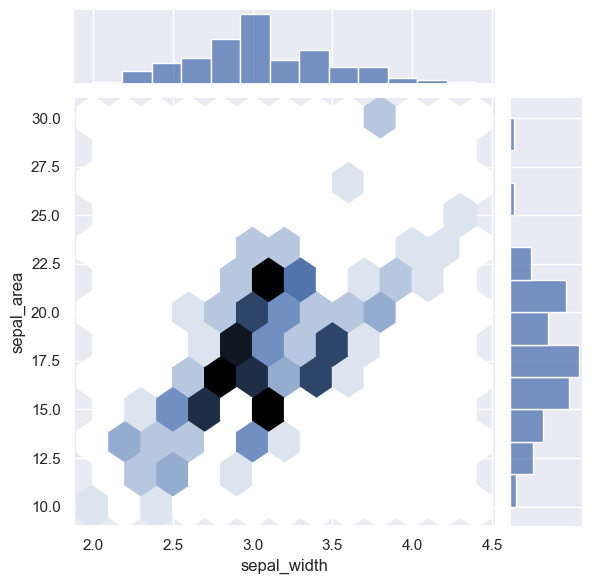

In [35]:
sns.jointplot(x = 'sepal_width', y = 'sepal_area', data = df, kind = 'hex')

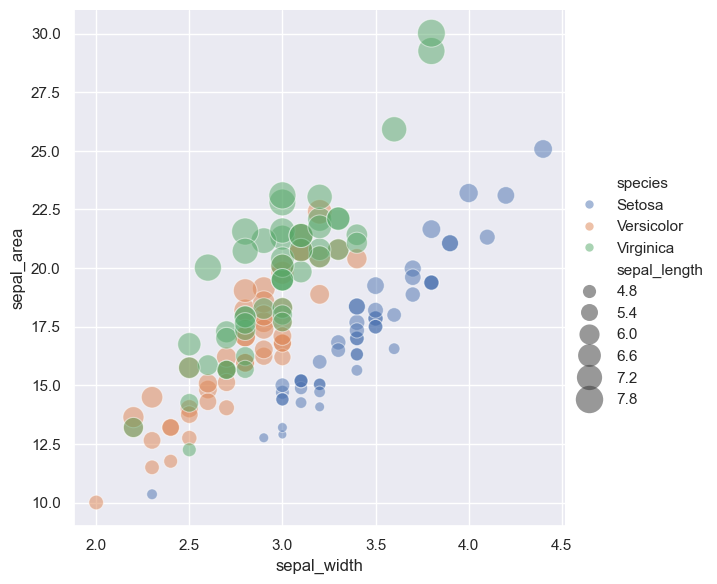

In [36]:
sns.relplot(x="sepal_width", y="sepal_area", hue="species", size="sepal_length", sizes=(40, 400), alpha=.5, height=6, data=df)

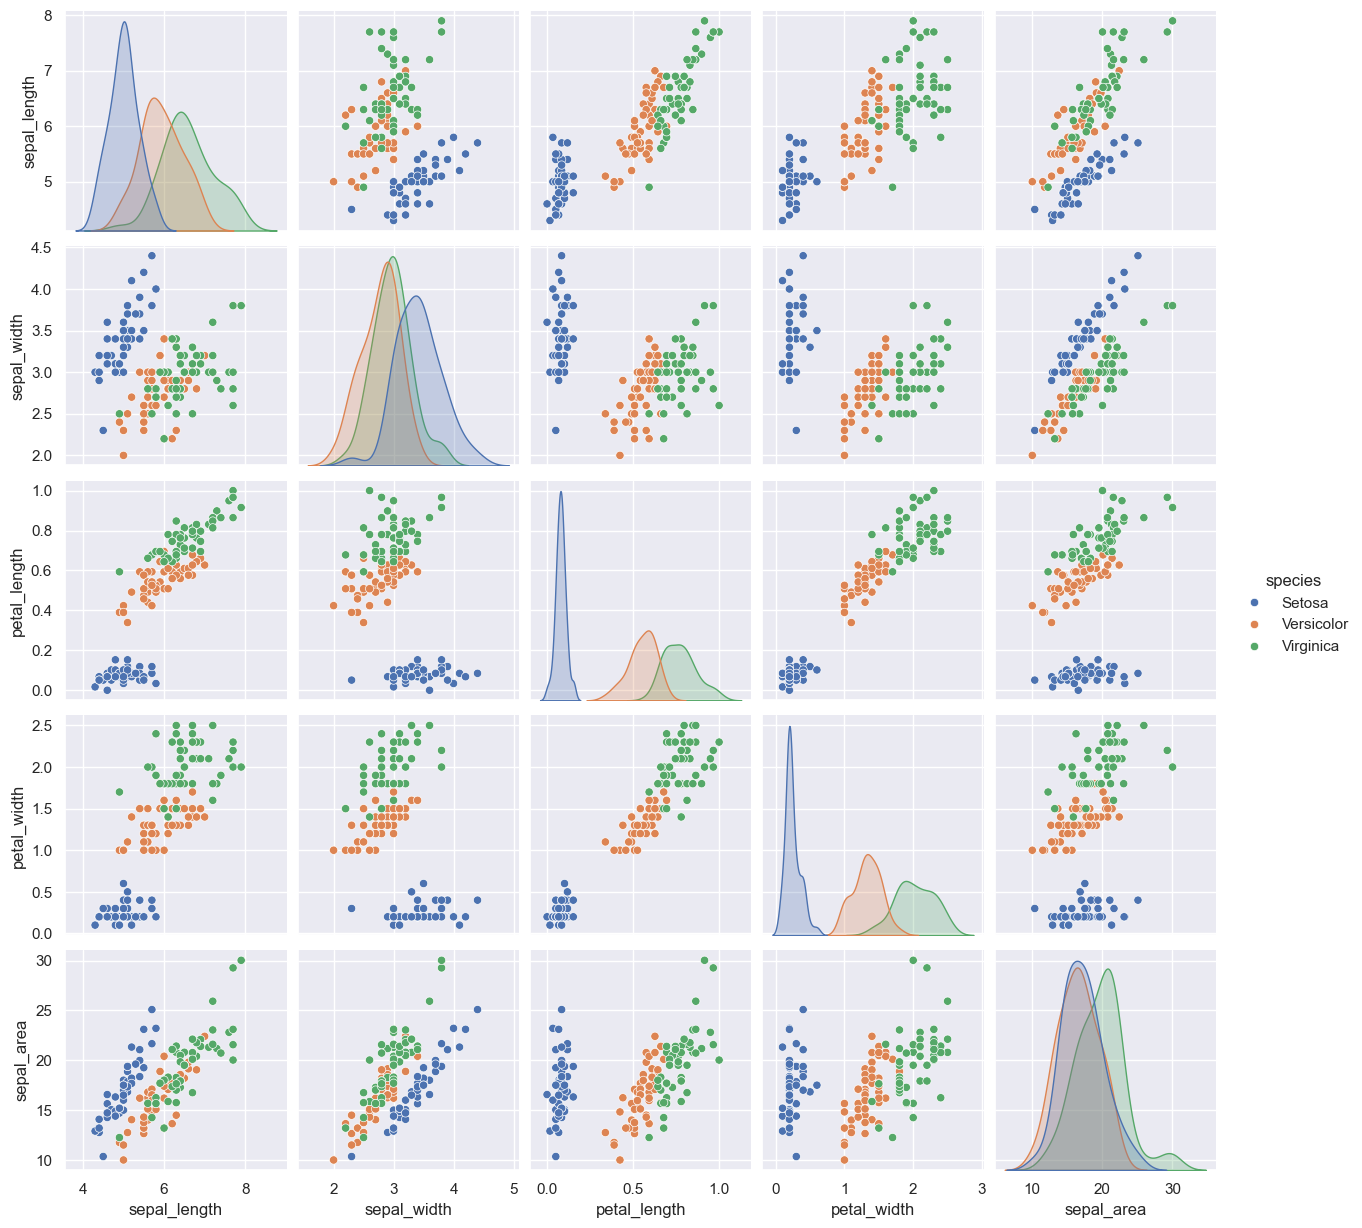

In [37]:
grid = sns.pairplot(df, hue = 'species')

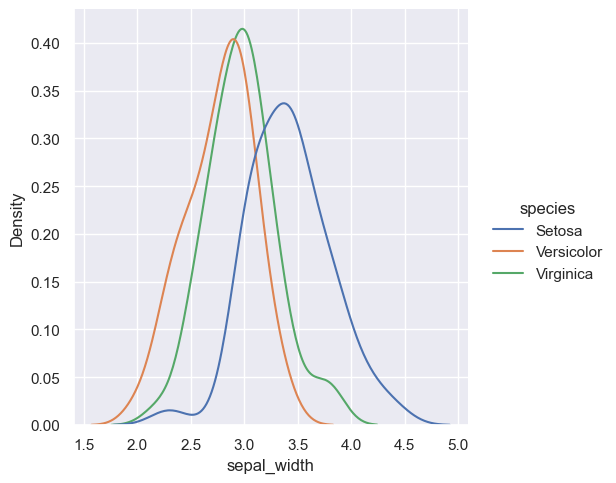

In [38]:
sns.displot(data = df, x = 'sepal_width', kind = 'kde', hue = 'species')

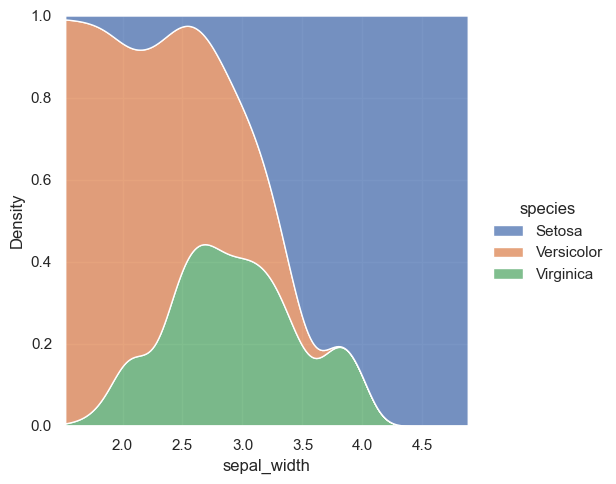

In [39]:
sns.displot(data = df, x = 'sepal_width', kind = 'kde', hue = 'species', multiple = 'fill')

<Axes: >

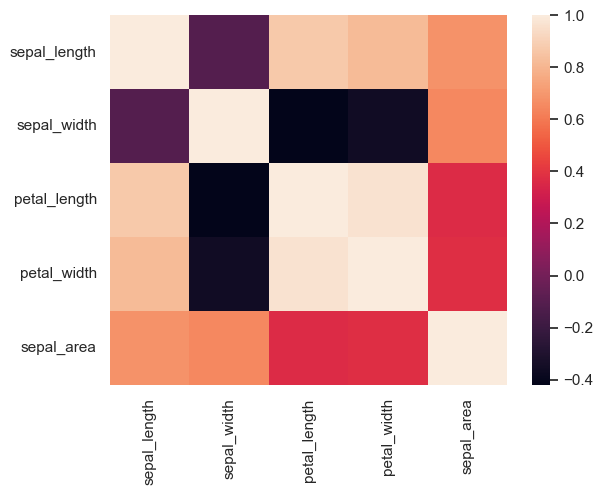

In [43]:
sns.heatmap(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area']].corr())


<Axes: >

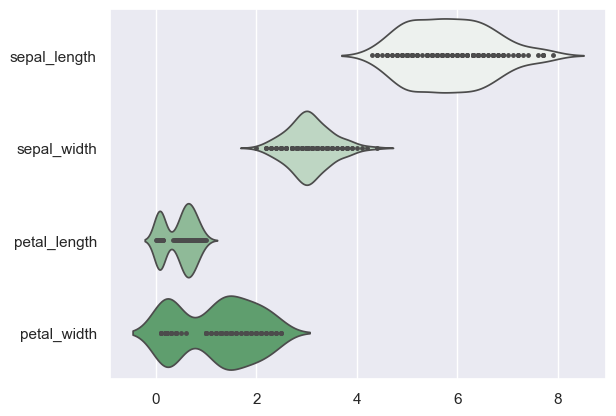

In [63]:
sns.violinplot(data=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], palette="light:g", inner="points", orient="h")

#### 3D Plotting

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


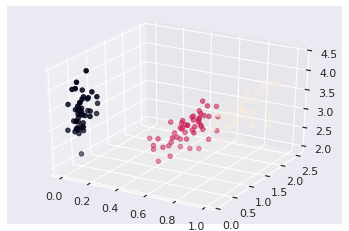

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['petal_length'], df['petal_width'], df['sepal_width'], zdir='z', s=20, c=df['species'].astype('category').cat.codes, depthshade=True)

## Exercises I: Numpy and Matplotlib



### 1. System of linear equations

Using numpy, solve the following linear equation:



$\begin{bmatrix}
   1 & 2 & 3.3 & 2 \\
   3 & 3.6 & 7 & 0 \\
   1 & 3 & -1 & 12 \\
   2 & 11 & 4 & 16
\end{bmatrix}
\begin{bmatrix}
   x_1 \\
   x_2 \\
   x_3 \\
   x_4
\end{bmatrix}=\begin{bmatrix}
   10 \\
   15 \\
   3 \\
   -1
\end{bmatrix}$

In [1]:
# Your code here
import numpy as np

A = np.array([
    [1, 2, 3.3, 2],
    [3, 3.6, 7, 0],
    [1, 3, -1, 12],
    [2, 11, 4, 16]
])

b = np.array([10, 15, 3, -1])

x = np.linalg.solve(A, b)

print("Solution:")
print(x)


Solution:
[-1.28937298 -4.34942596  4.9322932   1.85582867]


### 2. Simple numpy exercises
1. Given an matrix, calculate the sum for each row

2. Given an vector, normalize the vector using the $l_{10}$ norm

In [2]:
M = np.array([
    [1, 2, 3],
    [9, 3, 10],
    [3, 5, 0],
    [1, 7, -3],
    [0, -2, 3],
    
])

v = np.array([100, 2302, 2, -10, 134, -1])

row_sums = M.sum(axis=1)

l10_norm = np.linalg.norm(v, ord=10)

v_normalized = v / l10_norm

print("Row sums:", row_sums)
print("Normalized vector:", v_normalized)

Row sums: [ 6 22  8  5  1]
Normalized vector: [ 4.34404865e-02  1.00000000e+00  8.68809731e-04 -4.34404865e-03
  5.82102520e-02 -4.34404865e-04]


### 3. Harder numpy exercises

Using the matrix and vector defined above:

1. Subtract the mean of each column in a given matrix.

2. Get the 3rd largest value in an array.


In [66]:
import numpy as np

# Given matrix
M = np.array([
    [1, 2, 3],
    [9, 3, 10],
    [3, 5, 0],
    [1, 7, -3],
    [0, -2, 3],
])

# Given vector
v = np.array([100, 2302, 2, -10, 134, -1])

# 1. Subtract the mean of each column in the matrix
column_means = M.mean(axis=0)
M_centered = M - column_means
print("Matrix after subtracting column means:\n", M_centered)

# 2. Get the 3rd largest value in the vector
third_largest = np.partition(v, -3)[-3]
print("3rd largest value in the vector:", third_largest)


Matrix after subtracting column means:
 [[-1.8 -1.   0.4]
 [ 6.2  0.   7.4]
 [ 0.2  2.  -2.6]
 [-1.8  4.  -5.6]
 [-2.8 -5.   0.4]]
3rd largest value in the vector: 100


### 4. Plot some functions
Using numpy and matplotlib, plot the following functions (you can choose the colors and styling, interval of interest and other parameters):

$f_1(x) = max(0, x)$

$f_2(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$

$f_3(x) = \frac{1}{1 + e^{-x}}$

$f_4(x) = \frac{1}{\mu^2 + 1}*e^{-\frac{(x - \mu)^2}{b^2}}$

$f_5(x) = 0.5x (1 + tanh(0.797885x + 0.035677x^3))$

Note that all plots should have relevant ticks, labels and a title.  

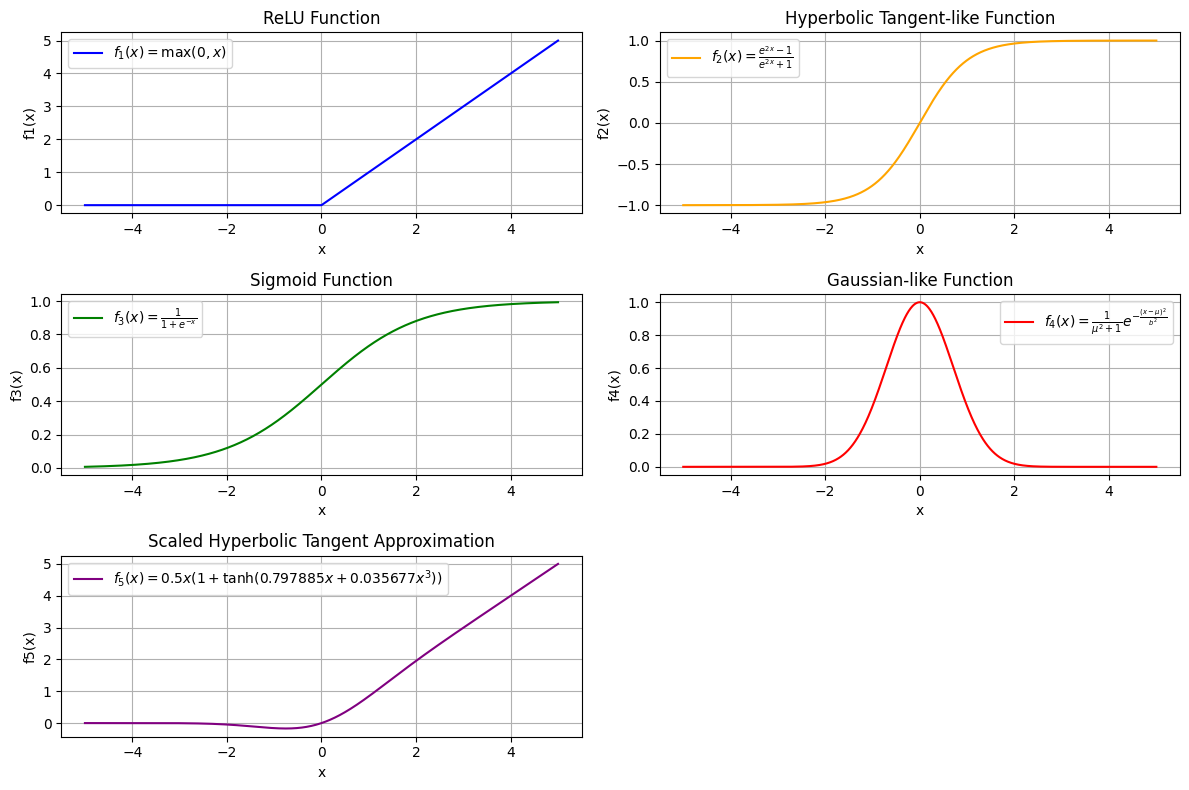

In [5]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)

mu = 0
b = 1

f1 = np.maximum(0, x)
f2 = (np.exp(2 * x) - 1) / (np.exp(2 * x) + 1)
f3 = 1 / (1 + np.exp(-x))
f4 = (1 / (mu**2 + 1)) * np.exp(-((x - mu)**2) / b**2)
f5 = 0.5 * x * (1 + np.tanh(0.797885 * x + 0.035677 * x**3))

plt.figure(figsize=(12, 8))

# Plot f1(x)
plt.subplot(3, 2, 1)
plt.plot(x, f1, label=r'$f_1(x) = \max(0, x)$', color='blue')
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.grid(True)
plt.legend()

# Plot f2(x)
plt.subplot(3, 2, 2)
plt.plot(x, f2, label=r'$f_2(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$', color='orange')
plt.title('Hyperbolic Tangent-like Function')
plt.xlabel('x')
plt.ylabel('f2(x)')
plt.grid(True)
plt.legend()

# Plot f3(x)
plt.subplot(3, 2, 3)
plt.plot(x, f3, label=r'$f_3(x) = \frac{1}{1 + e^{-x}}$', color='green')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('f3(x)')
plt.grid(True)
plt.legend()

# Plot f4(x)
plt.subplot(3, 2, 4)
plt.plot(x, f4, label=r'$f_4(x) = \frac{1}{\mu^2 + 1} e^{-\frac{(x - \mu)^2}{b^2}}$', color='red')
plt.title('Gaussian-like Function')
plt.xlabel('x')
plt.ylabel('f4(x)')
plt.grid(True)
plt.legend()

# Plot f5(x)
plt.subplot(3, 2, 5)
plt.plot(x, f5, label=r'$f_5(x) = 0.5x (1 + \tanh(0.797885x + 0.035677x^3))$', color='purple')
plt.title('Scaled Hyperbolic Tangent Approximation')
plt.xlabel('x')
plt.ylabel('f5(x)')
plt.grid(True)
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


### 5. Prettify Plot

Given the below plot, make it look presentable. Add **square** markers to scatter plots, **dashdotted** lines, add relevant axis **limits** and **ticks**, a **legend** and a **title**. 

**NB**: A plot should be self-contained. Any reader should understand it without have to refer to its text description. 


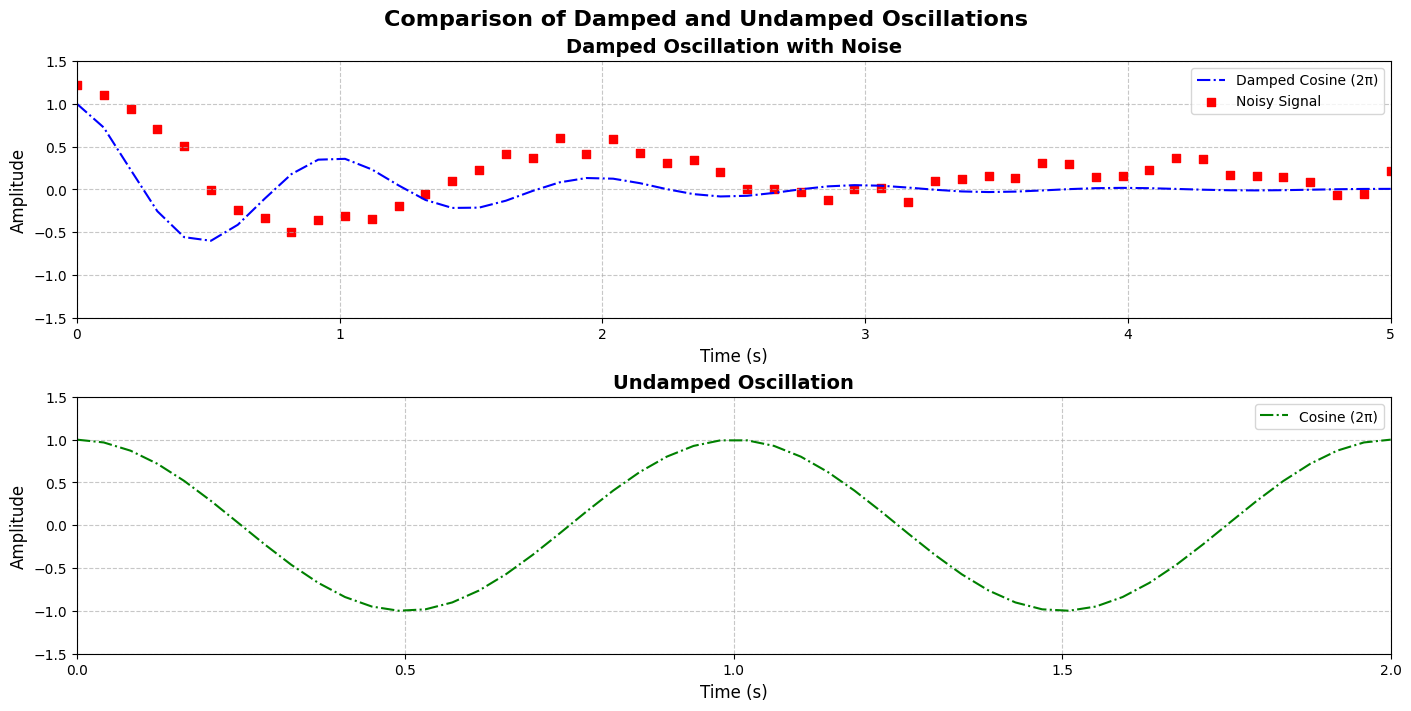

In [4]:
# Data Synthetization
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)
y3 = np.cos(1 * np.pi * x1) * np.exp(-0.5 * x1) + 0.3 * np.random.random(size = x1.shape)

# Plotting code
# TODO make this pretty.

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 7), constrained_layout=True)

# First subplot
ax1.plot(x1, y1, color='blue', linestyle='dashdot', label='Damped Cosine (2π)')
ax1.scatter(x1, y3, color='red', marker='s', label='Noisy Signal')
ax1.set_xlim(0, 5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xticks(np.linspace(0, 5, 6))
ax1.set_yticks(np.linspace(-1.5, 1.5, 7))
ax1.set_xlabel('Time (s)', fontsize=12)
ax1.set_ylabel('Amplitude', fontsize=12)
ax1.set_title('Damped Oscillation with Noise', fontsize=14, weight='bold')
ax1.legend(fontsize=10, loc='upper right')
ax1.grid(True, linestyle='--', alpha=0.7)

# Second subplot
ax2.plot(x2, y2, color='green', linestyle='dashdot', label='Cosine (2π)')
ax2.set_xlim(0, 2)
ax2.set_ylim(-1.5, 1.5)
ax2.set_xticks(np.linspace(0, 2, 5))
ax2.set_yticks(np.linspace(-1.5, 1.5, 7))
ax2.set_xlabel('Time (s)', fontsize=12)
ax2.set_ylabel('Amplitude', fontsize=12)
ax2.set_title('Undamped Oscillation', fontsize=14, weight='bold')
ax2.legend(fontsize=10, loc='upper right')
ax2.grid(True, linestyle='--', alpha=0.7)

fig.suptitle('Comparison of Damped and Undamped Oscillations', fontsize=16, weight='bold')
plt.show()

## Exercises II: Pandas, Seaborn and Data Visualization

In [7]:
import requests
import json
import pandas as pd

covid_data = json.loads(requests.get('https://www.graphs.ro/json.php').content)

covid_df = pd.DataFrame(covid_data['covid_romania'])
covid_df.head()

covid_county_data_dfs = []

for i, row in covid_df.iterrows():
  try: # some days have no county information
    county_df = pd.DataFrame(row['county_data'])
  except:
    continue

  county_df['reporting_date'] = row['reporting_date']
  covid_county_data_dfs.append(county_df)


county_df = pd.concat(covid_county_data_dfs)
covid_df = covid_df.drop(['sourceUrl', 'county_data'], axis = 1)

In [17]:
covid_df.head()
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 994 entries, 0 to 993
Data columns (total 28 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   reporting_date                              994 non-null    datetime64[ns]
 1   total_cases                                 994 non-null    int64         
 2   new_cases_today                             994 non-null    int64         
 3   total_tests                                 983 non-null    float64       
 4   new_tests_today                             982 non-null    float64       
 5   total_deaths                                975 non-null    float64       
 6   new_deaths_today                            974 non-null    float64       
 7   OLD_deaths                                  273 non-null    float64       
 8   total_recovered                             721 non-null    float64       
 9   new_recove

In [20]:
county_df.head()

,county_id,county_name,county_population,total_cases,reporting_date
0,AB,Alba,323778,59583,2022-11-21
1,AR,Arad,415732,78172,2022-11-21
2,AG,Arges,574920,81208,2022-11-21
3,BC,Bacau,580912,69291,2022-11-21
4,BH,Bihor,559992,92159,2022-11-21


### 1. Basic Visualizations

Make 4 subplots. Using pandas as seaborn, plot the number of new cases in a day, the number of recovered patients in day, number of tests in a day, and the number of deaths in day. We are trying to explore the evolution of COVID from the start of the pandemic until today.

**NB:** Make sure to add proper labels, title, axes and legend where necessary.

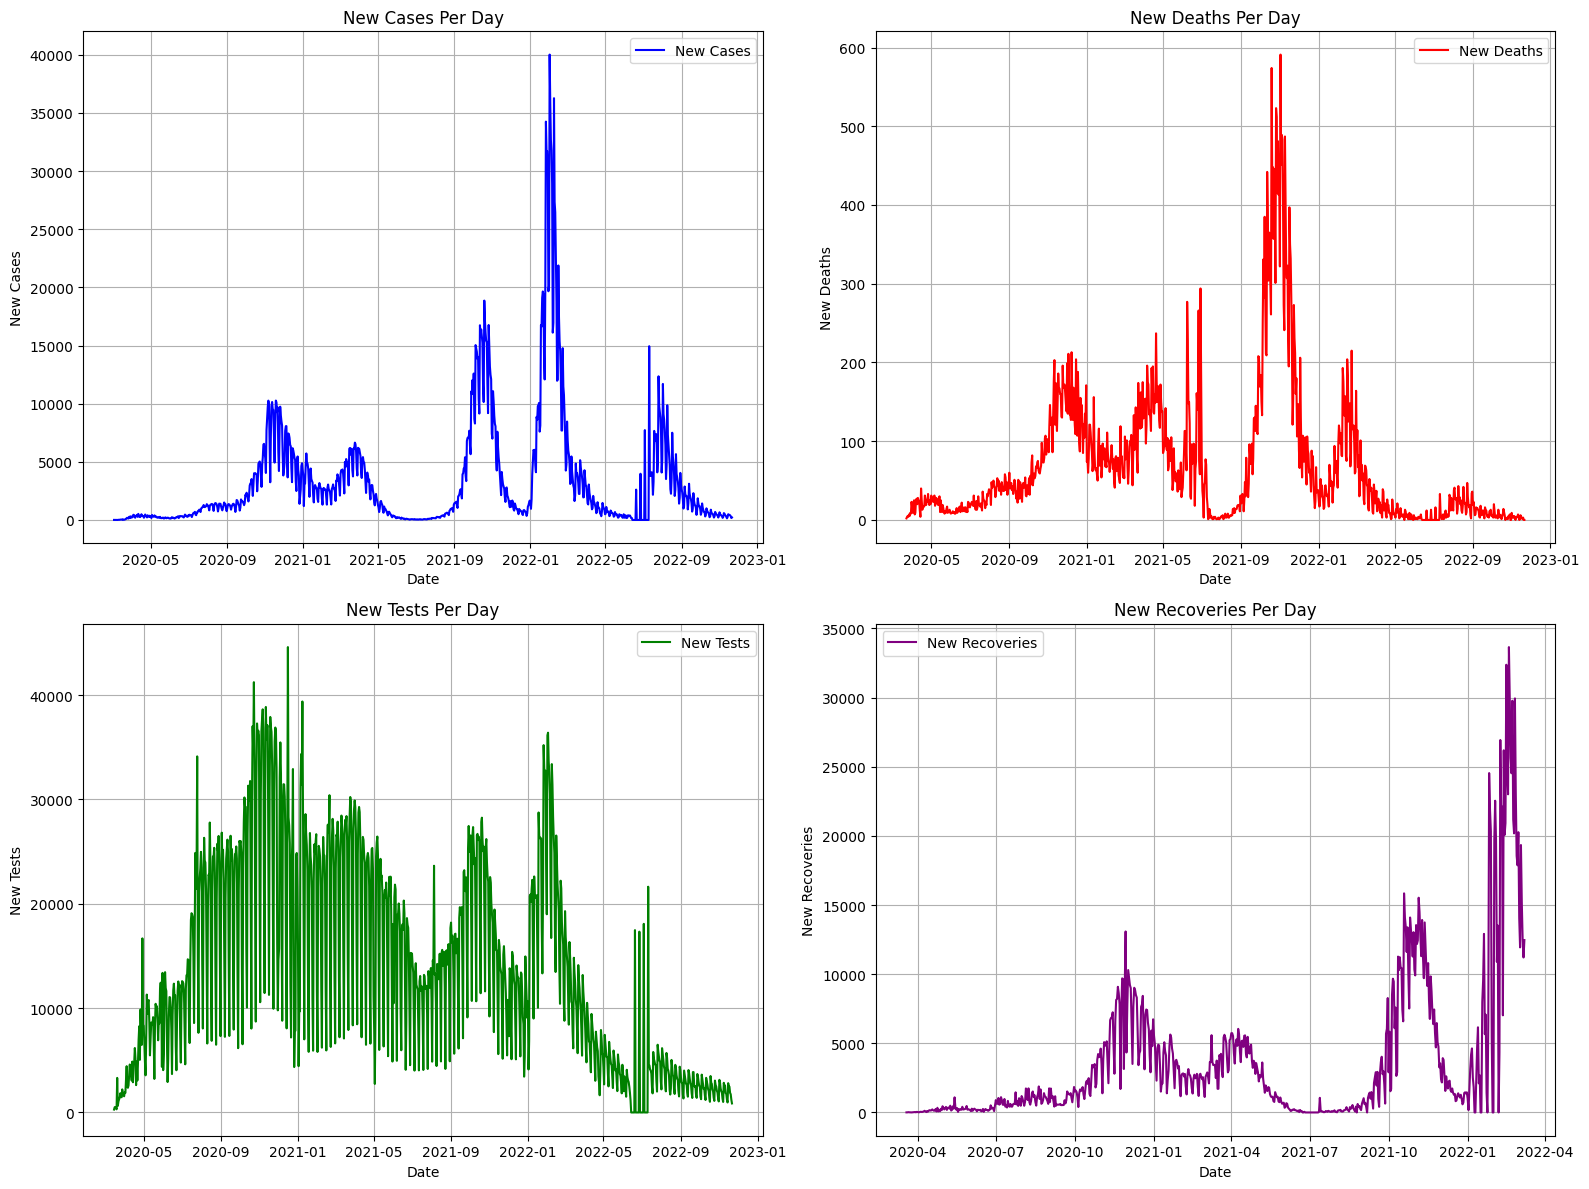

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

covid_df['reporting_date'] = pd.to_datetime(covid_df['reporting_date'])

columns_to_convert = ['new_cases_today', 'new_deaths_today', 'new_tests_today', 'new_recovered_today']
covid_df[columns_to_convert] = covid_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(16, 12))

# Subplot 1: New cases per day
plt.subplot(2, 2, 1)
sns.lineplot(x='reporting_date', y='new_cases_today', data=covid_df, label='New Cases', color='blue')
plt.title('New Cases Per Day')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True)
plt.legend()

# Subplot 2: New deaths per day
plt.subplot(2, 2, 2)
sns.lineplot(x='reporting_date', y='new_deaths_today', data=covid_df, label='New Deaths', color='red')
plt.title('New Deaths Per Day')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.grid(True)
plt.legend()

# Subplot 3: New tests per day
plt.subplot(2, 2, 3)
sns.lineplot(x='reporting_date', y='new_tests_today', data=covid_df, label='New Tests', color='green')
plt.title('New Tests Per Day')
plt.xlabel('Date')
plt.ylabel('New Tests')
plt.grid(True)
plt.legend()

# Subplot 4: New recoveries per day
plt.subplot(2, 2, 4)
sns.lineplot(x='reporting_date', y='new_recovered_today', data=covid_df, label='New Recoveries', color='purple')
plt.title('New Recoveries Per Day')
plt.xlabel('Date')
plt.ylabel('New Recoveries')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


### 2. Positive testing percentage

Using `pandas`, create a new column that computes the percentage of positive tests in a given day. This new column should be the number of infected people in a day over the number of tests per day.

Plot the evolution of positive tests across time. Compare this to the number of hospitalized patients. 

In a different plot, visualize the correlation between positive tests and the number of intensive care patients.

**NB:** Make sure to add proper labels, title, axes and legend where necessary.


D:\TEMP\ipykernel_18228\4038042914.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_cleaned['positive_test_percentage'] = (covid_df_cleaned['new_cases_today'] / covid_df_cleaned['new_tests_today']) * 100


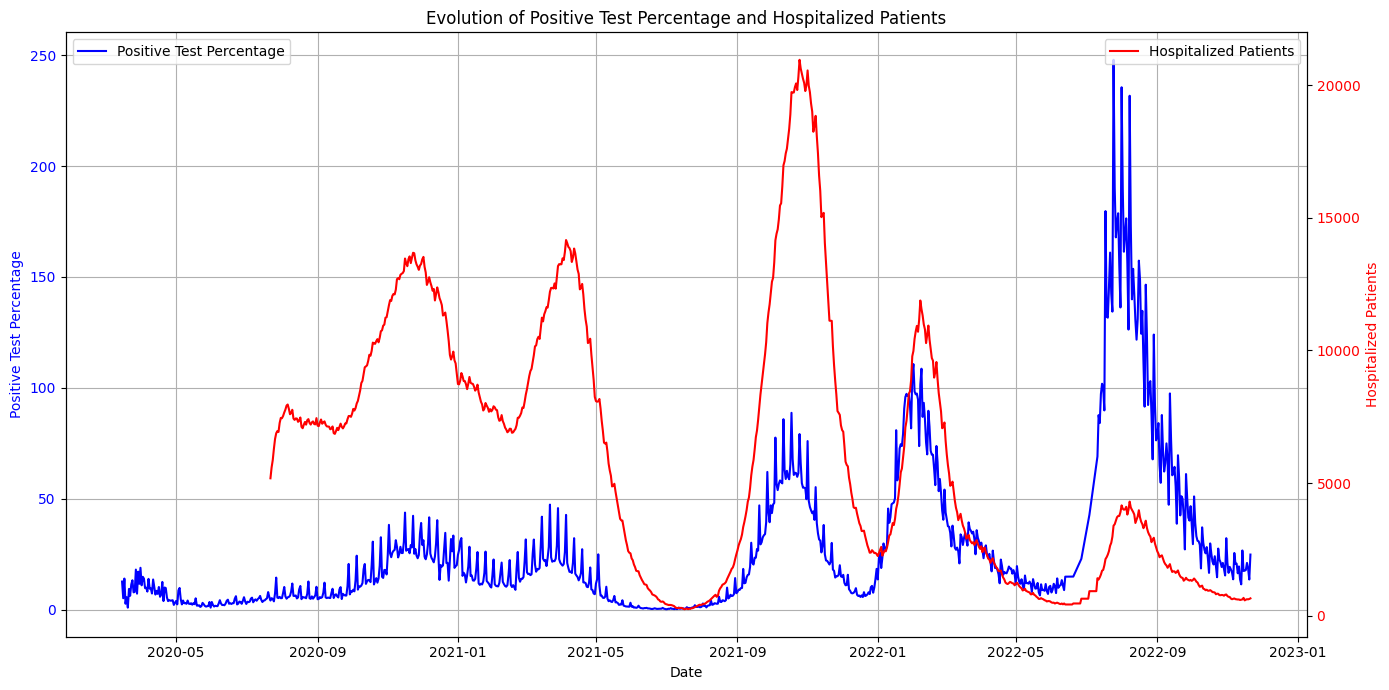

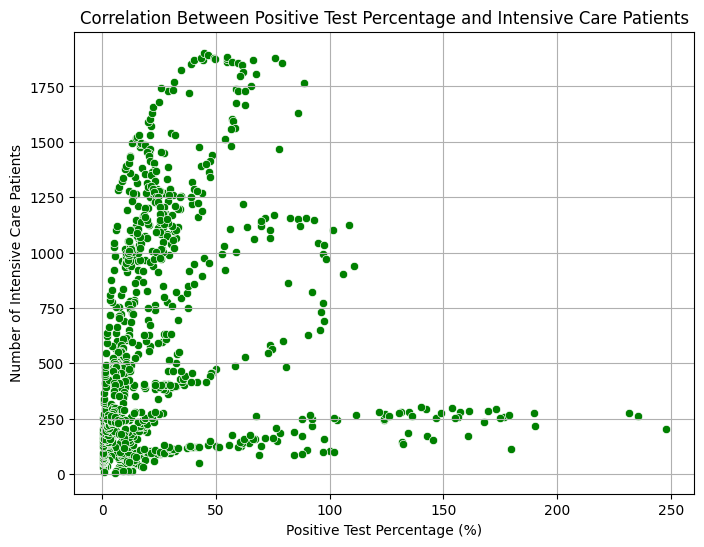

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json

covid_data = json.loads(requests.get('https://www.graphs.ro/json.php').content)

covid_df = pd.DataFrame(covid_data['covid_romania'])

covid_df['reporting_date'] = pd.to_datetime(covid_df['reporting_date'])

covid_df_cleaned = covid_df.dropna(subset=['new_cases_today', 'new_tests_today'])

covid_df_cleaned['positive_test_percentage'] = (covid_df_cleaned['new_cases_today'] / covid_df_cleaned['new_tests_today']) * 100

# Plot 1: Evolution of Positive Test Percentage and Number of Hospitalized Patients
fig, ax1 = plt.subplots(figsize=(14, 7))

sns.lineplot(data=covid_df_cleaned, x='reporting_date', y='positive_test_percentage', ax=ax1, color='blue', label='Positive Test Percentage')
ax1.set_xlabel('Date')
ax1.set_ylabel('Positive Test Percentage', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Evolution of Positive Test Percentage and Hospitalized Patients')

ax2 = ax1.twinx()
sns.lineplot(data=covid_df_cleaned, x='reporting_date', y='infected_hospitalized', ax=ax2, color='red', label='Hospitalized Patients')
ax2.set_ylabel('Hospitalized Patients', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True)

plt.tight_layout()
plt.show()

# Plot 2: Correlation between positive test percentage and number of intensive care patients
plt.figure(figsize=(8, 6))
sns.scatterplot(x='positive_test_percentage', y='intensive_care_right_now', data=covid_df_cleaned, color='green')
plt.title('Correlation Between Positive Test Percentage and Intensive Care Patients')
plt.xlabel('Positive Test Percentage (%)')
plt.ylabel('Number of Intensive Care Patients')
plt.grid(True)
plt.show()



### 3. County Information

Select at least 10 counties of your choosing, and plot the evolution of cases across time. 

Plot the number of positive cases on 1000 persons for each of your selected counties. Plot a horizontal line at the 3 / 1000 mark. When the number of positive cases per 1000 persons exceeds 3 / 1000, color your points in a different color from that point onwards.


**NB:** Make sure to add proper labels, title, axes and legend where necessary.


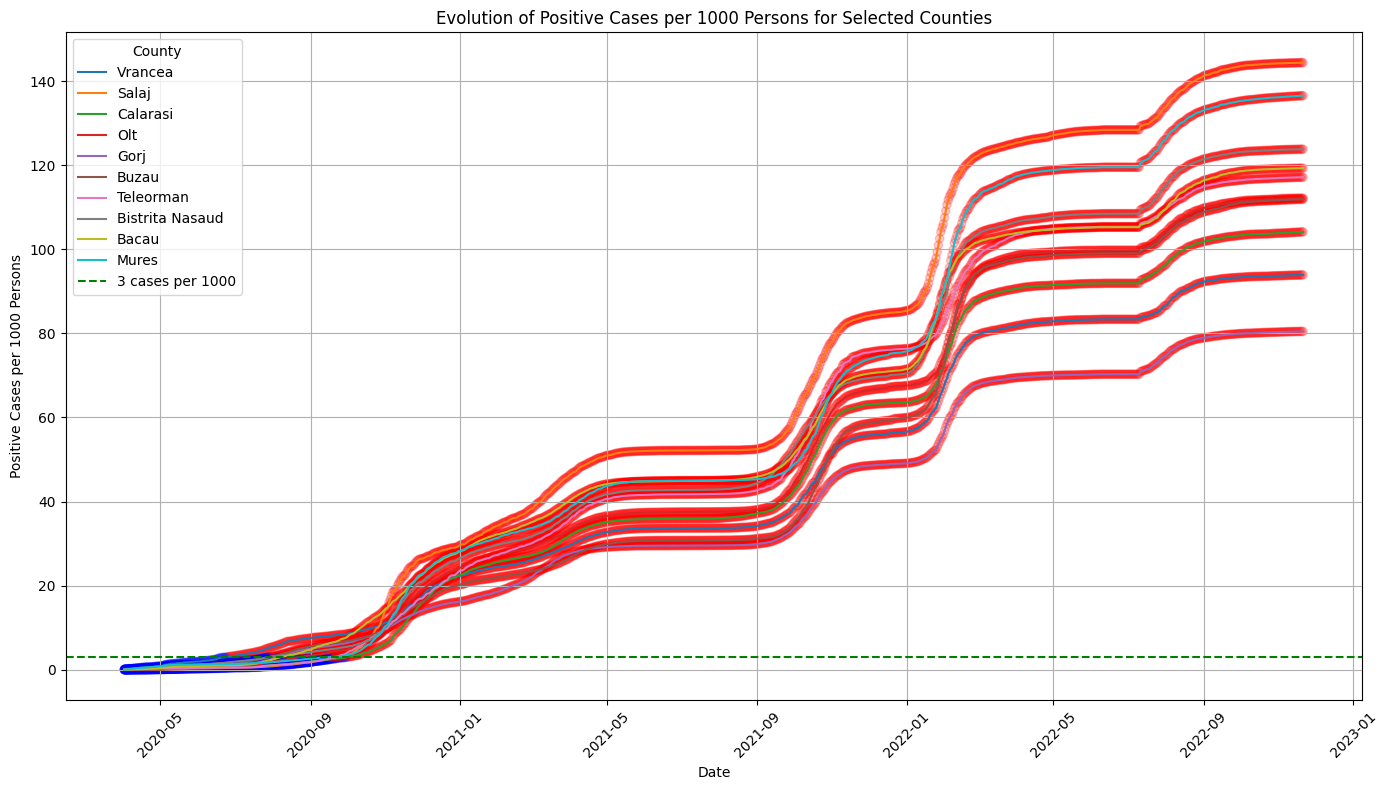

In [42]:

covid_county_data_dfs = []

for i, row in covid_df.iterrows():
    try:  
        county_df = pd.DataFrame(row['county_data'])
    except:
        continue

    county_df['reporting_date'] = row['reporting_date']
    covid_county_data_dfs.append(county_df)


county_df = pd.concat(covid_county_data_dfs)


selected_counties = np.random.choice(county_df['county_name'].unique(), size=10, replace=False)


county_df['positive_cases_per_1000'] = (county_df['total_cases'] / county_df['county_population']) * 1000


plt.figure(figsize=(14, 8))


for county in selected_counties:
    county_data = county_df[county_df['county_name'] == county]
    
    
    plt.plot(county_data['reporting_date'], county_data['positive_cases_per_1000'], label=county)
    
   
    plt.scatter(county_data['reporting_date'], county_data['positive_cases_per_1000'], 
                c=np.where(county_data['positive_cases_per_1000'] > 3, 'red', 'blue'), alpha=0.2)


plt.axhline(y=3, color='green', linestyle='--', label='3 cases per 1000')


plt.title('Evolution of Positive Cases per 1000 Persons for Selected Counties')
plt.xlabel('Date')
plt.ylabel('Positive Cases per 1000 Persons')
plt.xticks(rotation=45)
plt.legend(title='County', loc='upper left')
plt.grid(True)


plt.tight_layout()
plt.show()



## Open-ended question. 

Please choose one of the following two questions. 
1. Question 1  
More than 6 millions people have died because of the COVID-19 pandemic. However, some countries managed to keep the death toll low by swift responses and right policy. 
Download [this](https://github.com/owid/covid-19-data/tree/master/public/data) realtime dataset for Covid data. Visualize the effects of government's policies on COVID cases and death. Choose at least two countries and make constrastive comparison. The policy data is not provided and you need to find it yourself. Please note that we expect an extensive analysis and visualization for this question.

2. Question 2  
Using the [Multi-source dataset of urban life in Milan and the Province of Trentino](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/EGZHFV), please choose a few events or variables of interest and explore their ralationship. Your task is to identify and visualize behavior correlations between these events to gain insights into urban life patterns.  
Consider events like weather conditions (e.g., rain, temperature), time of day (morning, afternoon, evening), and individual behaviors (e.g., SMS and call activity, movement patterns). Explore how these events may be related to each other and how they influence urban life.

In [ ]:
# TODO your code here